<a href="https://colab.research.google.com/github/musaib-js/machineLearning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll be using the Fashion MNIST dataset to create a machine learning model that will identify the type of cloth from an image

In [ ]:
!pip install -U tensorflow_datasets

In [3]:
from __future__ import absolute_import, division, print_function

# Import Tensorflow and tensorflow datasets
import tensorflow as tf
import tensorflow_datasets as tdfs
import logging

tf.get_logger().setLevel(logging.ERROR)

#Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)


2.15.0


Now, we'll load the Fashion MNIST dataset

In [4]:
dataset, metadata = tdfs.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQSKB6R/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQSKB6R/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [1]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat'
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples {}'.format(num_train_examples))
print('Number of testing examples {}'.format(num_test_examples))

Number of training examples 60000
Number of testing examples 10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

  #Normalise every image in the training and test set
  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

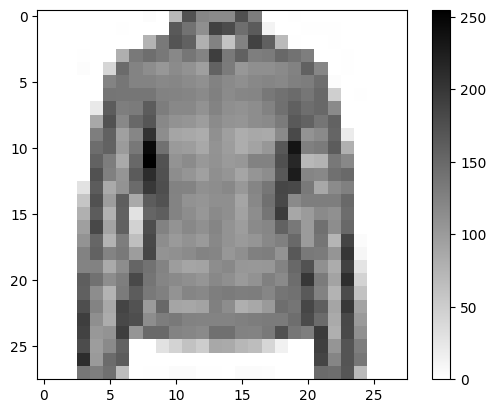

In [8]:
#Take an image from the test data set and remove the color and dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

#Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.softmax)
    ])

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs = 5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 2.5825 - accuracy: 0.7350
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5954 - accuracy: 0.7974
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5263 - accuracy: 0.8192
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4979 - accuracy: 0.8318
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4962 - accuracy: 0.8271


In [14]:
#Accuracy Evaluation
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_train_examples/32))

1875/1875 [==============================] - 2s 711us/step - loss: 0.5447 - accuracy: 0.8100


In [15]:
# making predictions

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 93ms/step


In [16]:
predictions.shape

(32, 128)

In [17]:
predictions[0]

array([6.05294597e-04, 9.38295998e-05, 5.18621989e-02, 3.91040416e-03,
       8.79564941e-01, 4.99660839e-15, 6.39367923e-02, 5.51070768e-17,
       2.64177888e-05, 2.56345059e-17, 5.88074285e-19, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.79126203e-34, 8.20369637e-25,
       0.00000000e+00, 4.05616778e-26, 1.99981702e-24, 0.00000000e+00,
       0.00000000e+00, 1.12883335e-21, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.03375172e-32, 0.00000000e+00, 0.00000000e+00,
       6.72494929e-24, 0.00000000e+00, 0.00000000e+00, 1.79529990e-32,
       0.00000000e+00, 0.00000000e+00, 2.59181464e-27, 7.38768157e-18,
       3.94172208e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.89031013e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.72071514e-20, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.78271030e-21,
       1.70535605e-30, 0.00000000e+00, 0.00000000e+00, 5.86483958e-18,
      

In [18]:
np.argmax(predictions[0])

4

In [19]:
test_labels[0]

4

In [20]:
class_names[test_labels[0]]

'CoatSandal'